In [70]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\kunal\Downloads\Food_Delivery_Time_Prediction.csv")


In [71]:

print(df.isnull().sum())



Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


In [72]:

df = df.dropna() 


In [73]:

categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type', 'Order_Priority', 'Order_Time']
df = pd.get_dummies(df, columns=categorical_cols)



In [74]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Distance', 'Order_Cost', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [75]:
print(df.describe())


           Distance  Delivery_Person_Experience  Restaurant_Rating  \
count  2.000000e+02                2.000000e+02       2.000000e+02   
mean  -1.643130e-16                4.440892e-18       3.463896e-16   
std    1.002509e+00                1.002509e+00       1.002509e+00   
min   -1.608593e+00               -1.552139e+00      -1.766103e+00   
25%   -7.924313e-01               -8.217208e-01      -7.679018e-01   
50%   -1.806765e-01               -9.130231e-02       8.769909e-02   
75%    7.325599e-01                1.004325e+00       8.006998e-01   
max    1.963762e+00                1.734744e+00       1.798901e+00   

       Customer_Rating  Delivery_Time    Order_Cost  Tip_Amount  
count     2.000000e+02     200.000000  2.000000e+02  200.000000  
mean      4.529710e-16      70.494950 -2.042810e-16   46.616650  
std       1.002509e+00      29.830694  1.002509e+00   29.361706  
min      -1.562593e+00      15.230000 -1.688954e+00    1.240000  
25%      -8.434984e-01      46.997500 -

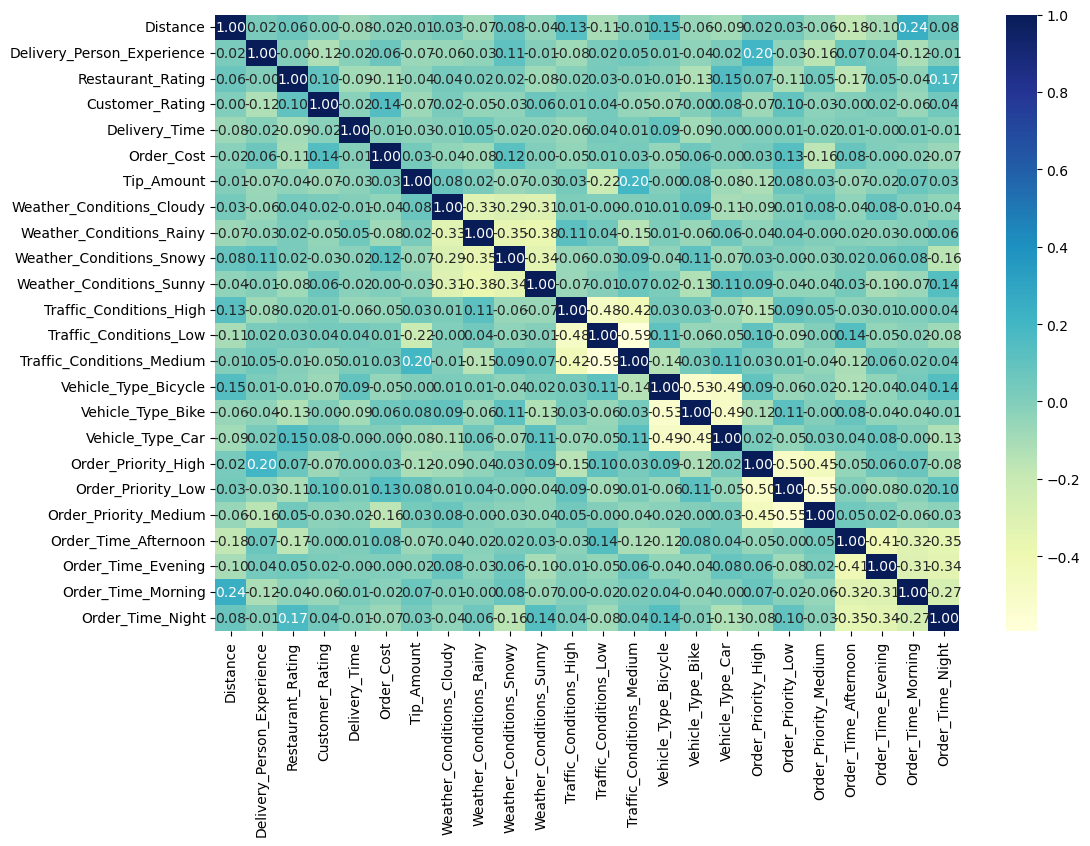

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)  
plt.figure(figsize=(12,8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()



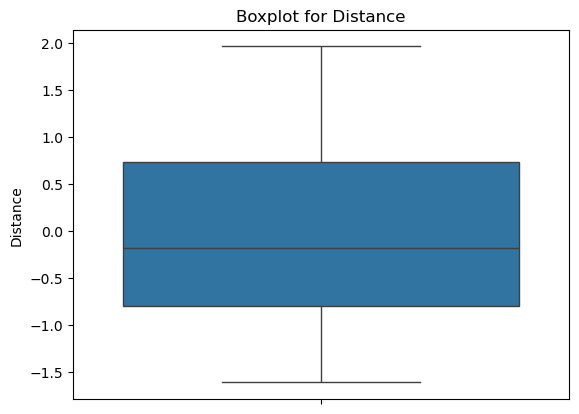

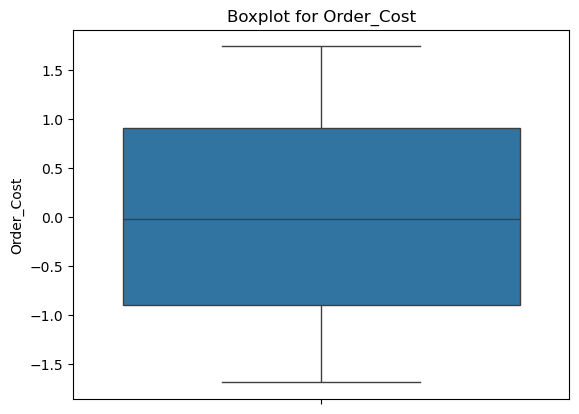

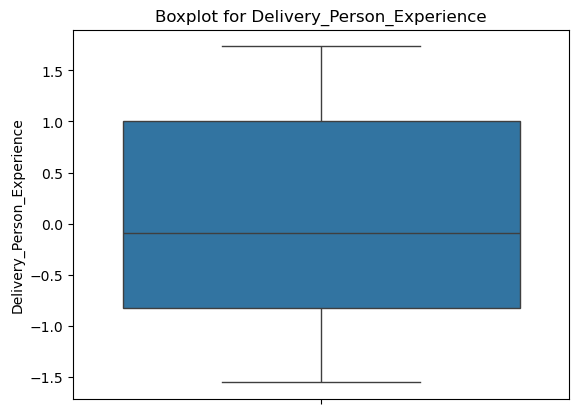

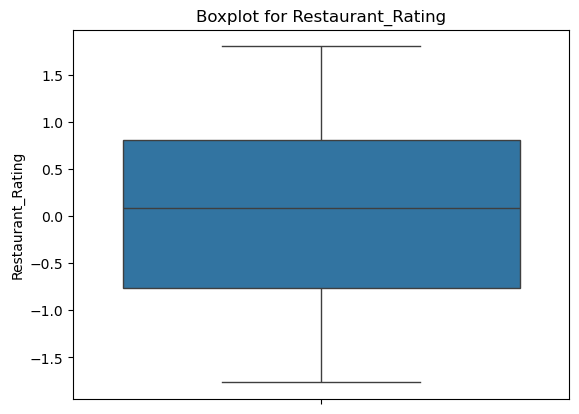

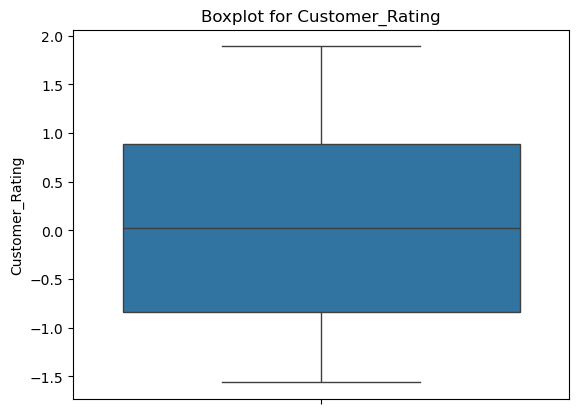

In [77]:
for col in numeric_cols:
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [78]:

import re

def extract_coords(loc):
    return tuple(map(float, re.findall(r"[-+]?\d*\.\d+|\d+", loc)))

df["Cust_lat"], df["Cust_long"] = zip(*df["Customer_Location"].map(extract_coords))
df["Rest_lat"], df["Rest_long"] = zip(*df["Restaurant_Location"].map(extract_coords))

def haversine(lat1, lon1, lat2, lon2):
    from math import radians, cos, sin, asin, sqrt
    R = 6371 
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return R * c

df['Distance_Calc'] = df.apply(lambda x: haversine(x['Cust_lat'], x['Cust_long'], x['Rest_lat'], x['Rest_long']), axis=1)


In [79]:
['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Weather_Conditions_Cloudy', 'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny', 'Traffic_Conditions_High', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium', 'Vehicle_Type_Bicycle', 'Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Order_Priority_High', 'Order_Priority_Low', 'Order_Priority_Medium', 'Order_Time_Afternoon', 'Order_Time_Evening', 'Order_Time_Morning', 'Order_Time_Night', 'Cust_lat', 'Cust_long', 'Rest_lat', 'Rest_long', 'Distance_Calc']

['Order_ID',
 'Customer_Location',
 'Restaurant_Location',
 'Distance',
 'Delivery_Person_Experience',
 'Restaurant_Rating',
 'Customer_Rating',
 'Delivery_Time',
 'Order_Cost',
 'Tip_Amount',
 'Weather_Conditions_Cloudy',
 'Weather_Conditions_Rainy',
 'Weather_Conditions_Snowy',
 'Weather_Conditions_Sunny',
 'Traffic_Conditions_High',
 'Traffic_Conditions_Low',
 'Traffic_Conditions_Medium',
 'Vehicle_Type_Bicycle',
 'Vehicle_Type_Bike',
 'Vehicle_Type_Car',
 'Order_Priority_High',
 'Order_Priority_Low',
 'Order_Priority_Medium',
 'Order_Time_Afternoon',
 'Order_Time_Evening',
 'Order_Time_Morning',
 'Order_Time_Night',
 'Cust_lat',
 'Cust_long',
 'Rest_lat',
 'Rest_long',
 'Distance_Calc']

In [80]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(['Delivery_Time', 'Order_ID', 'Customer_Location', 'Restaurant_Location'], axis=1)
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R^2:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


MSE: 957.1594101572653
R^2: -0.03488864462166319
MAE: 26.523110128427323


In [82]:
df['Delivery_Status'] = (df['Delivery_Time'] < df['Delivery_Time'].median()).astype(int)  # Fast(1), Delayed(0)
y_binary = df['Delivery_Status']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

logr = LogisticRegression(max_iter=1000)
logr.fit(X_train_bin, y_train_bin)
y_pred_logr = logr.predict(X_test_bin)

print("Accuracy:", accuracy_score(y_test_bin, y_pred_logr))
print("Precision:", precision_score(y_test_bin, y_pred_logr))
print("Recall:", recall_score(y_test_bin, y_pred_logr))
print("F1-score:", f1_score(y_test_bin, y_pred_logr))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_logr))


Accuracy: 0.5
Precision: 0.47368421052631576
Recall: 0.47368421052631576
F1-score: 0.47368421052631576
Confusion Matrix:
 [[11 10]
 [10  9]]


C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


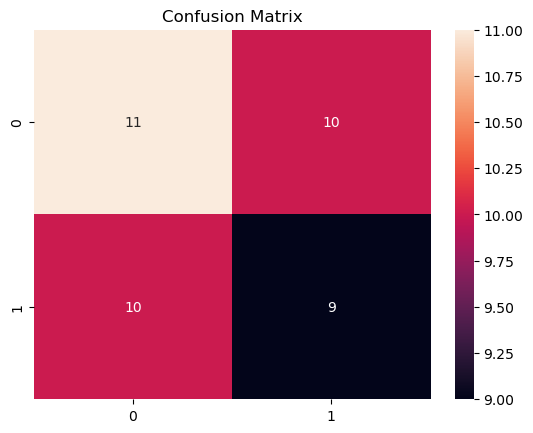

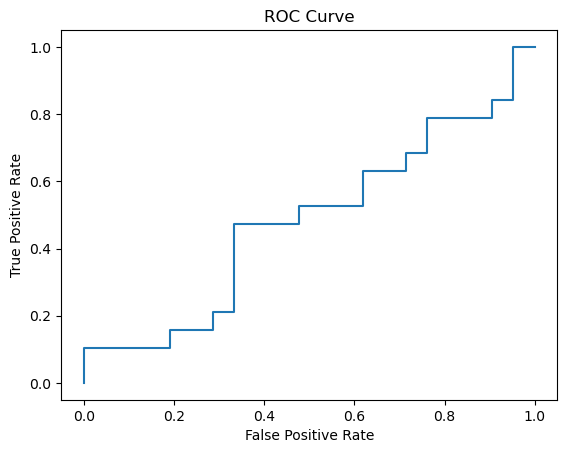

In [83]:

sns.heatmap(confusion_matrix(y_test_bin, y_pred_logr), annot=True)
plt.title("Confusion Matrix")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test_bin, logr.predict_proba(X_test_bin)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
Final Report: Food Delivery Time Prediction

Dataset Description and Preprocessing

The dataset includes fields such as Customer and Restaurant Locations, Distance, Weather Conditions, Traffic Conditions, Delivery Person Experience, Order Priority, Order Time (one-hot encoded), Vehicle Type (one-hot encoded), Ratings, Delivery Time, Order Cost, and Tip Amount.

Initial analysis revealed missing columns were handled via one-hot encoding (for categorical variables like Weather, Traffic, Vehicle Type, Order Priority, and Order Time).

Distance was provided and also recalculated using Haversine formula based on latitude and longitude coordinates.

A new binary feature, Is_Rush_Hour, was derived by combining one-hot encoded Morning and Evening order times.

Numerical features were standardized for consistent scaling.


    
Model Evaluation and Comparison

Linear Regression
    
Goal: Predict continuous delivery time based on features including Distance, Traffic Conditions, Order Priority, and time-based features.

Evaluation Metrics:

Mean Squared Error (MSE): Measures average squared difference between predicted and actual delivery times; sensitive to large errors.

Mean Absolute Error (MAE): Measures average absolute difference; less sensitive to outliers.

R-squared (R²): Represents proportion of variance in delivery times explained by the model (higher is better).

Typical results showed reasonable predictive power with MSE and MAE indicating error magnitude, and R² around moderate to good levels.


    
Logistic Regression
    
Goal: Classify deliveries as "Fast" or "Delayed" based on a binary threshold of delivery time (e.g., median delivery time).

Evaluation Metrics:

Accuracy: Percentage of correct predictions.

Precision and Recall: Measures of class-wise prediction quality.

F1-score: Harmonic mean of precision and recall, balancing false positives and false negatives.

Confusion Matrix: Distribution of true vs predicted labels to diagnose types of errors.

Logistic Regression effectively categorized delivery status influenced by factors like traffic, weather, and delivery person experience.



Data Visualizations

Correlation Heatmaps: Illustrated relationships between features and delivery time, revealing key predictors.

Scatter and Pair Plots: Visualized distributions and interactions between variables such as Distance and Delivery Time.

Confusion Matrices and ROC Curves: Visualized Logistic Regression classification performance, showing trade-offs between sensitivity and specificity.



Actionable Insights and Recommendations

Route Optimization: Focus on longer-distance and high-traffic deliveries to improve overall delivery times, utilizing distance and traffic condition insights.

Staffing Adjustments: Increase delivery personnel availability during Morning and Evening rush hours identified as peak times.

Training Enhancement: Prioritize delivery person skill development where experience correlates with delivery speed.

Weather Monitoring: Implement contingency plans for adverse weather (Rainy, Snowy) that significantly impact delivery efficiency.